<a href="https://colab.research.google.com/github/hrishipoola/cartoonize_LinkedIn_photo/blob/main/cartoonizing_photo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cartoonize a Photo

## Table of Contents

1. Introduction
2. Install & Import Packages
3. Read & Display Image
4. Detect Edges
5. Reduce Color Palette
6. Blur
7. Combine Effects
8. Compare
9. References

## 1. Introduction

In our post [Fun With Numpy](https://crawstat.com/2020/10/09/fun-with-numpy-image-processing/) from a few months ago, we loaded a color photo, converted it to a 3D pixel array, and edited it simply using numpy. 

I recently came across a post on [cartoonizing a photo](https://towardsdatascience.com/turn-photos-into-cartoons-using-python-bb1a9f578a7e) with python using cv2 and numpy and tried it out to cartoonize my LinkedIn profile photo. It follows two core principles underlying a cartoon:

1) Sharper, more pronounced edges 
<br>2) Fewer, more homogeneous colors 

We'll detect edges by defining a function that converts to grayscale, reduces noise, and uses cv2.adaptiveThreshold to detect edges. We'll reduce color palette using K-means clustering, setting the number of clusters to 7. We'll soften using cv2.bilateralFilter, which smooths flat regions while keeping edges sharp. Lastly, we'll combine the edge and color effects using bitwise_and and compare our original and final cartoon images. Here's our notebook on [Google Colab](https://colab.research.google.com/drive/17YOeVmsCNKMIVWNNWAP4eubkPH3YbygT?usp=sharing) and [Git](https://github.com/hrishipoola/cartoonize_LinkedIn_photo). Try it out on your own photo! 

## 2. Install & Import Packages

In [ ]:
import numpy as np
import pandas as pd
import cv2
from google.colab.patches import cv2_imshow # for image display on Google Colab
from skimage import io
from PIL import Image 
import matplotlib.pylab as plt

## 3. Read & Display Image

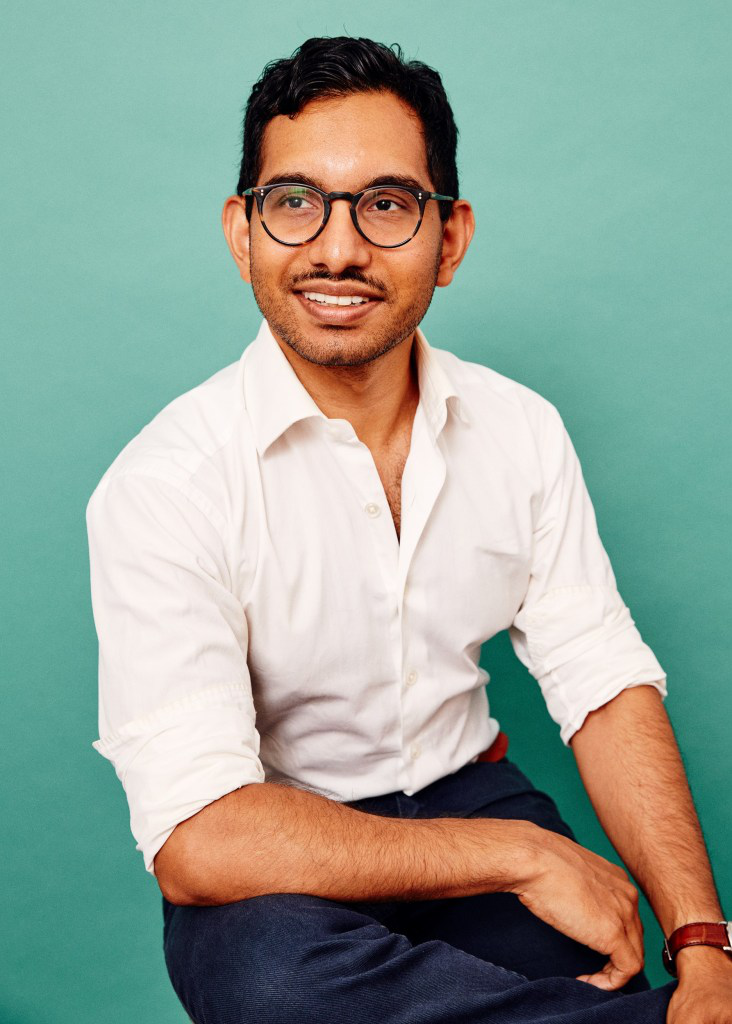

In [ ]:
# Read and display image
url = "https://i1.wp.com/crawstat.com/wp-content/uploads/2020/05/180615_DALIA_PORTRAITS-10.jpg?resize=732%2C1024&ssl=1"
img_raw = io.imread(url) 
img = cv2.cvtColor(img_raw, cv2.COLOR_BGR2RGB)
cv2_imshow(img)

## 4. Detect Edges

In that function, we transform the image into grayscale. Then, we reduce the noise of the blurred grayscale image by using cv2.medianBlur. The larger blur value means fewer black noises appear in the image. And then, apply adaptiveThreshold function, and define the line size of the edge. A larger line size means the thicker edges that will be emphasized in the image.



In [ ]:
def edge_mask(img, line_size, blur_value):
  
  # Convert to grayscale
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 

  # Reduce noise of blurred grayscale image to reduce number of detected edges
  # Median filter replaces pixel with median value of pixel in nearby pixel neighborhood 
  gray_blur = cv2.medianBlur(gray, blur_value) 

  # Detect edges using adaptiveThreshold (calculates threshold for smaller regions and emphsizes black edges around objects)
  edges = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, line_size, blur_value)
  
  return edges

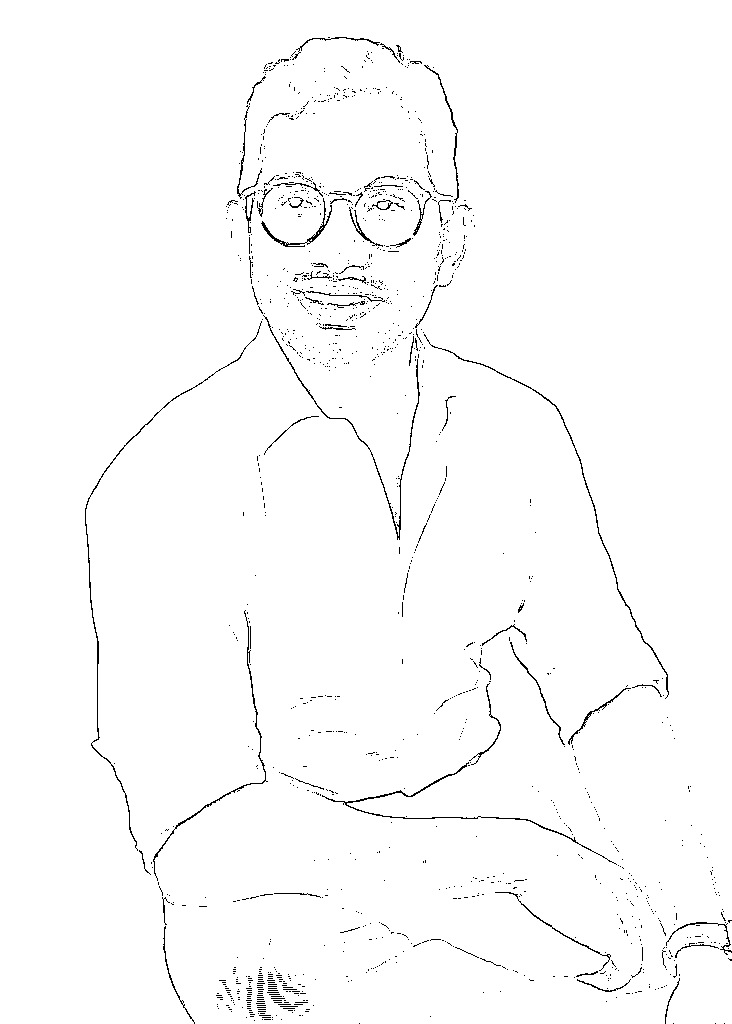

In [ ]:
line_size = 3
blur_value = 5

edges = edge_mask(img, line_size, blur_value)
cv2_imshow(edges)

## 5. Reduce Color Palette

We apply k-means clustering to reduce the number of colors, in our case, setting the number of clusters to 7



In [ ]:
# http://datahacker.rs/007-color-quantization-using-k-means-clustering/

def color_quantization(img, k):
# Transform the image
  data = np.float32(img).reshape((-1, 3))

# Determine criteria
  criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 0.1)

# Implementing K-Means clustering
  ret, label, center = cv2.kmeans(data, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
  center = np.uint8(center)
  result = center[label.flatten()]
  result = result.reshape(img.shape)
  return result

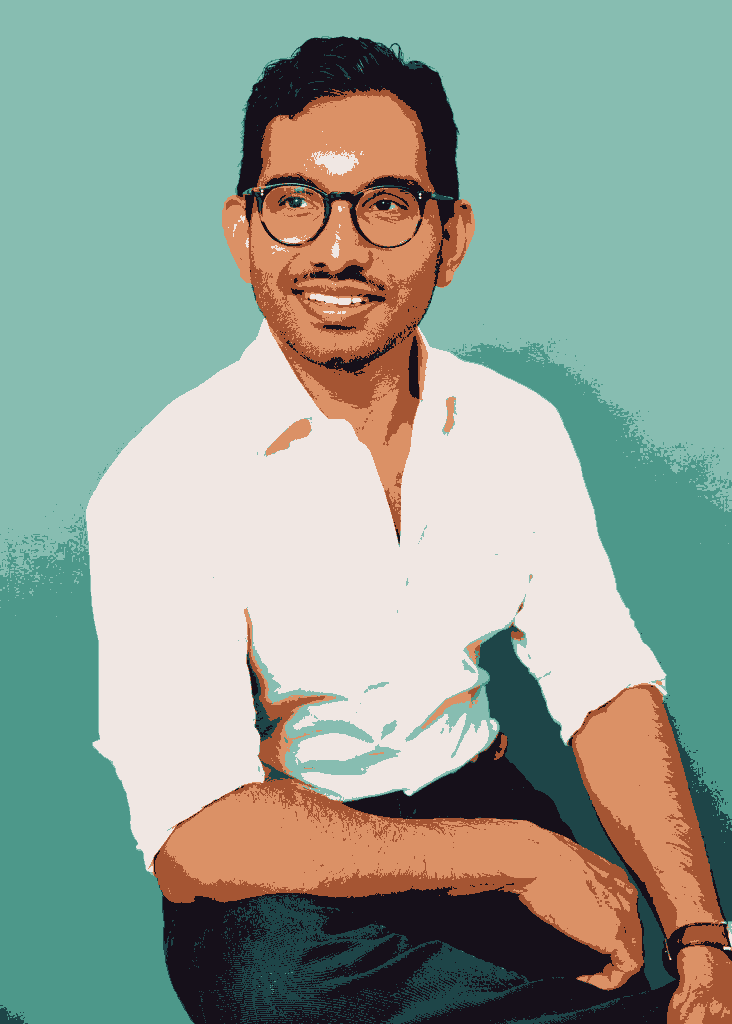

In [ ]:
total_color = 7

cartoon = color_quantization(img, total_color)
cv2_imshow(cartoon)

## 6. Soften

A bilateral filter replaces each pixel value with a weighted average of nearby pixel values, while also accounting for variation of pixel intensities in order to preserve edges (nearby pixels spatially must also have similar intensity). It's a great way to smooth flat regions while keeping edges sharp.

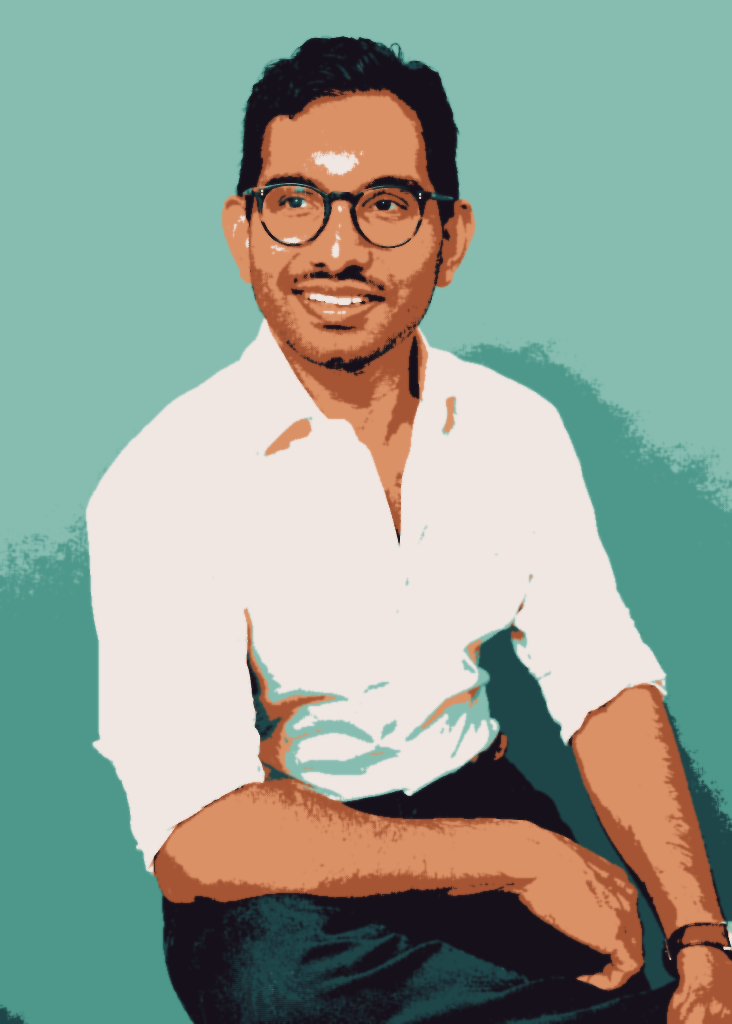

In [ ]:
# Soften using bilateralFilter

blurred = cv2.bilateralFilter(cartoon, d=4, sigmaColor=200,sigmaSpace=200)
cv2_imshow(blurred)

## 7. Combine Effects

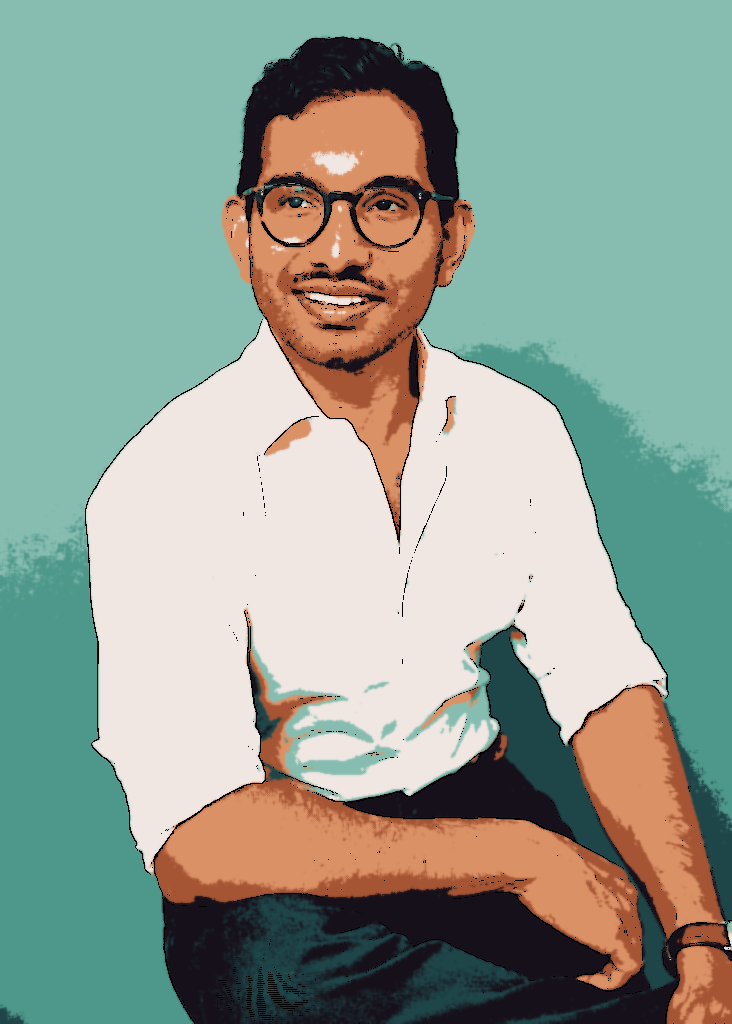

In [ ]:
# Combine edge and color+softening effects to create final cartoon
# http://datahacker.rs/005-image-arithmetic-and-logical-operations-in-opencv-with-python/

cartoon_final = cv2.bitwise_and(blurred, blurred, mask=edges)
cv2_imshow(cartoon_final)

## 8. Compare

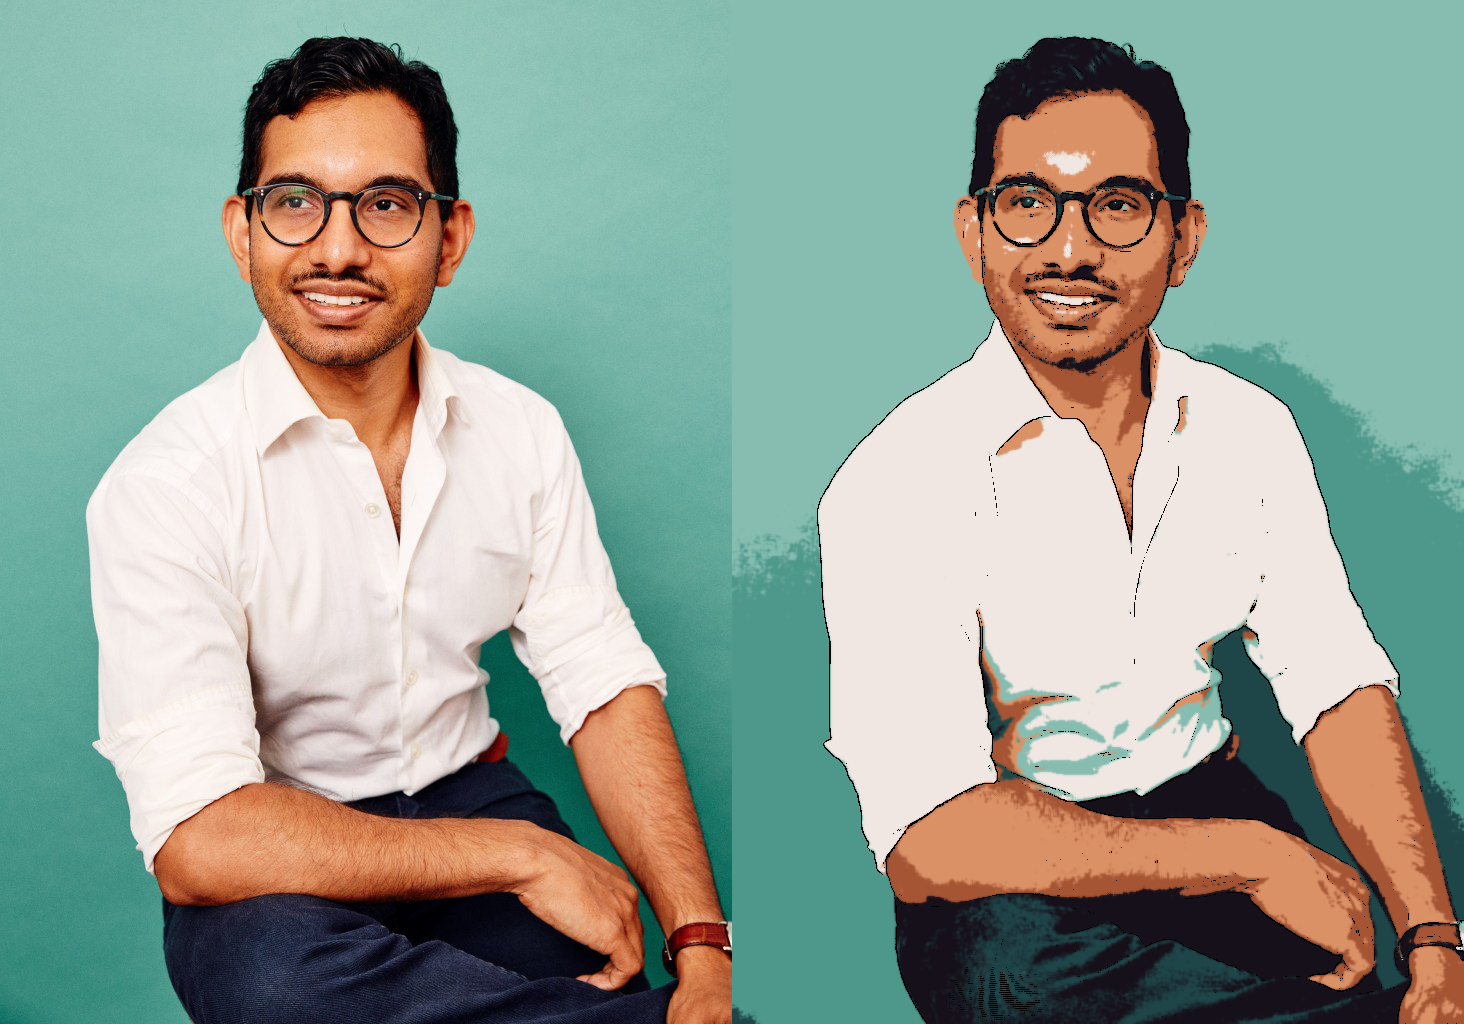

In [ ]:
# Concatenate original and final cartoon image
final = cv.hconcat((img, cartoon_final))
cv2_imshow(final)

## 9. References

https://colab.research.google.com/github/xn2333/OpenCV/blob/master/Image_Processing_in_Python_Final.ipynb

https://colab.research.google.com/drive/1lV5oJ_hI8PsSV1WDVWWfL18-tMm4vnxe?usp=sharing

https://towardsdatascience.com/turn-photos-into-cartoons-using-python-bb1a9f578a7e


http://datahacker.rs/002-opencv-projects-how-to-cartoonize-an-image-with-opencv-in-python/

https://www.programcreek.com/python/example/89394/cv2.kmeans


http://datahacker.rs/007-color-quantization-using-k-means-clustering/

http://datahacker.rs/005-image-arithmetic-and-logical-operations-in-opencv-with-python/
